# Deep Learning (ANN)

---

Here I will build simple Neural Network (ANN) and use MNIST dataset to train our model and make prediction on test dataset.

**Required Tool**

    - numpy
    - matplotlib
    - seaborn
    - keras
    - tensorflow 2
    
**Architecture**

    - Import Data
    - Basic EDA
    - Data Preprocessing
    - Data seperation as Train and Validation
    - Build ANN Network
    - Evaluate Model
    - Train Model
    - Evaluate Model Performance
    
---

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


# Data Processing

### Import the Data

In [2]:
import keras

In [3]:
(X_train, y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

### Basic EDA

AxesImage(54,36;334.8x217.44)
----------------------
The image label is 9


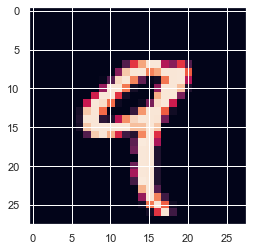

In [4]:
print(plt.imshow(X_train[4]))
print("----------------------")
print("The image label is", y_train[4])

In [5]:
X_train[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

#### Shape & Dimension of a Single image

In [6]:
print("Shape is",X_train[4].shape)
print("Dimensions is",X_train[4].ndim)

Shape is (28, 28)
Dimensions is 2


In [7]:
print("Shape is",y_train[4].shape)
print("Dimensions is",y_train[4].ndim)

Shape is ()
Dimensions is 0


In [8]:
print(y_train[4])
print(y_test[4])

9
4


 y_train[z]  ot y_test[z] i.e. a single element of y_train is a scaler 

In [9]:
print(y_train[4].shape)
print(y_test[4].shape)

()
()


##### Shape and Dimension of the whole Training & Testing Data set 

In [10]:
print("Shape is",X_train.shape)
print("Dimensions is",X_train.ndim)

Shape is (60000, 28, 28)
Dimensions is 3


In [11]:
print("Shape is",X_test.shape)
print("Dimensions is",X_test.ndim)

Shape is (10000, 28, 28)
Dimensions is 3


In [12]:
print("Shape is",y_train.shape)
print("Dimensions is",y_train.ndim)

Shape is (60000,)
Dimensions is 1


In [13]:
print("Shape is",y_test.shape)
print("Dimensions is",y_test.ndim)

Shape is (10000,)
Dimensions is 1


The whole y_train and y_test is a vector (array with 1 dimension)

In [14]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [15]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

## Scaling and Reshaping : Independent Dataset

In [16]:
X_train=X_train.reshape(60000,784)
X_test=X_test.reshape(10000,784)

In [17]:
print(X_train.ndim)
print(X_test.ndim)


2
2


In [18]:
print(X_train[4].shape)
print(X_train.shape)
print(X_test[4].shape)
print(X_test.shape)

(784,)
(60000, 784)
(784,)
(10000, 784)


In [19]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [20]:
len(X_train)

60000

## Making the Dependent Dataset ready 

In [21]:
from keras.utils import to_categorical

In [22]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [23]:
no_of_classes= len(np.unique(y_train))

In [24]:
no_of_classes

10

In [25]:
y_train= keras.utils.to_categorical(y_train,no_of_classes)
y_test= keras.utils.to_categorical(y_test,no_of_classes)

##### Refer y_train[4] & y_test[4]  to the earlier part of the code to check for their values and match with this one hot encoded values

In [26]:
y_train[4]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [27]:
print(y_test[4])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


## Create Testing and Validation Data Seperately

In [28]:
(X_train ,X_valid)= X_train[:45000],X_train[45000:]
(y_train ,y_valid)= y_train[:45000],y_train[45000:]

In [29]:
print(len(X_train))
print(len(X_valid))
print(len(y_train))
print(len(y_valid))

45000
15000
45000
15000


# Build a Neural Network

In [30]:
import tensorflow as tf

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [32]:
model=Sequential()

In [33]:
model.add(Dense(units=256,kernel_initializer='uniform',activation='relu',input_dim=784))

In [34]:
model.add(Dense(units=256,kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=256,kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=256,kernel_initializer='uniform',activation='relu'))

In [35]:
model.add(Dense(units=10,kernel_initializer='uniform',activation='softmax'))

In [36]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=(['accuracy']))

In [37]:
answers=model.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=50,batch_size=100,verbose=2)

Epoch 1/50
450/450 - 2s - loss: 0.4146 - accuracy: 0.8692 - val_loss: 0.1807 - val_accuracy: 0.9469
Epoch 2/50
450/450 - 2s - loss: 0.1345 - accuracy: 0.9595 - val_loss: 0.1301 - val_accuracy: 0.9611
Epoch 3/50
450/450 - 2s - loss: 0.0867 - accuracy: 0.9735 - val_loss: 0.1186 - val_accuracy: 0.9661
Epoch 4/50
450/450 - 2s - loss: 0.0665 - accuracy: 0.9794 - val_loss: 0.1314 - val_accuracy: 0.9619
Epoch 5/50
450/450 - 2s - loss: 0.0498 - accuracy: 0.9845 - val_loss: 0.1210 - val_accuracy: 0.9675
Epoch 6/50
450/450 - 2s - loss: 0.0428 - accuracy: 0.9865 - val_loss: 0.1101 - val_accuracy: 0.9702
Epoch 7/50
450/450 - 2s - loss: 0.0349 - accuracy: 0.9890 - val_loss: 0.1168 - val_accuracy: 0.9707
Epoch 8/50
450/450 - 2s - loss: 0.0320 - accuracy: 0.9898 - val_loss: 0.1033 - val_accuracy: 0.9739
Epoch 9/50
450/450 - 2s - loss: 0.0271 - accuracy: 0.9913 - val_loss: 0.1287 - val_accuracy: 0.9706
Epoch 10/50
450/450 - 2s - loss: 0.0243 - accuracy: 0.9928 - val_loss: 0.1113 - val_accuracy: 0.9739

In [38]:
results= model.evaluate(X_train,y_train)

1407/1407 [==============================] - 2s 1ms/step - loss: 0.0027 - accuracy: 0.9991


### results show loss and accuracy

In [39]:
results

[0.002665351377800107, 0.9990888833999634]

In [40]:
answers.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

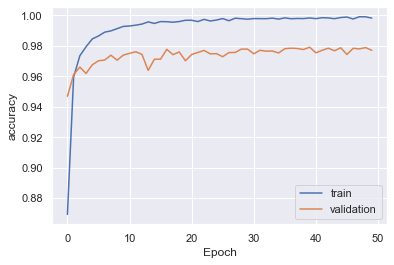

In [41]:
plt.plot(answers.history['accuracy'],label='train');
plt.plot(answers.history['val_accuracy'],label='validation')
plt.xlabel("Epoch")
plt.ylabel("accuracy")
plt.legend();

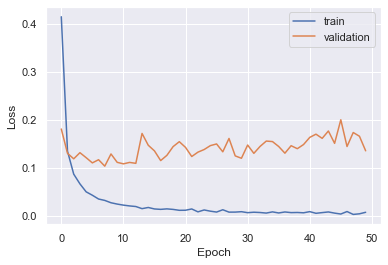

In [42]:
plt.plot(answers.history['loss'],label='train');
plt.plot(answers.history['val_loss'],label='validation')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend();